Import the libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.metrics import PrecisionRecallDisplay

sns.set_theme(style="whitegrid")
%matplotlib inline

# Step 1. Load the data.

In [2]:
data_path = "D:\\A K H I L\\Hackveda Internship\\2-EDA on credit card fraud detection\\creditcard.csv"
df = pd.read_csv(data_path)

# Step 2. Clean the data.

The dataset consists of 31 columns. v1-V28 are anonymous. The other three are time, amount and class.

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


There are 284807 rows in total. Coloumns Time, V1-V28 and Amount have numeric entries. Only Class coloumn has categorical values. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No missing values are found in the dataset. This dataset is pre-cleaned. 

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Step 3. Analyze and visualize the data to gain insights.

The describe() method shows a summary of the numerical attributes. In V1-V28, the features have been scaled to have comparable range of values. In the Amount coloum, the min is 0.0, 25% of all the transaction values fall below 5.6, 50% below 22.0, 75% below about 77.2, and the max is about 25691.2. It seems that the distribution is highly skewed.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Another way to get a feel of the data is to plot a histogram for each numerical attribute. For V1 to V28, the distributions of most of the PCA components are Gaussian, and may be centered around zero, suggesting that the attributes have been normalized by the PCA transformation. 

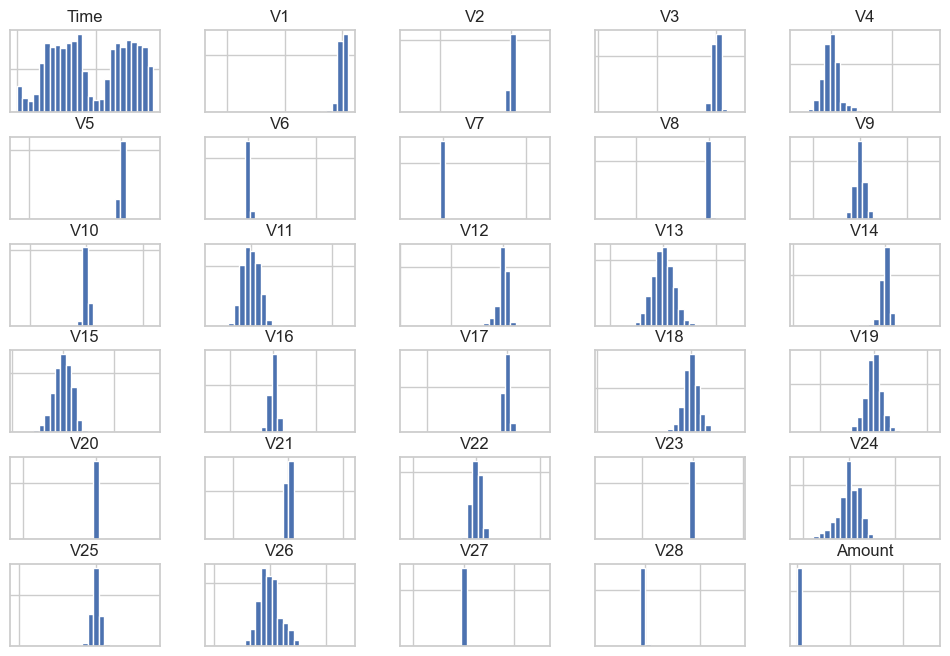

In [7]:
ax = df.drop('Class', axis=1).hist(bins=25, figsize=(12, 8))
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
plt.show()

Let us zoom in at the Amount atrribute, which seeems to be highly skewed. We introduce 7 intervals. Most of the transaction amounts are within (0,1000]. Only 7 are more than 10000. Some people may use credit cards to buy cars. 

In [8]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 10000, 26000]
cats = pd.cut(df.Amount,bins)
pd.value_counts(cats)

(0, 1000]         280042
(1000, 2000]        2264
(2000, 3000]         392
(3000, 4000]         164
(4000, 5000]          65
(5000, 10000]         48
(10000, 26000]         7
Name: Amount, dtype: int64

Now let us look at which attributes have good correlation with the Class column. If we choose a cut-off absolute value ~0.20, then V3,V10,V12,V14,V16 and V17 all have good correlations with the Class feature. Unfortunately V1-V28 are anonymous, otherwise we could contruct new features that might have higher correlation factors with Class attribute.

In [9]:
df_corr = df.corr()
df_corr['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

Let us plot the scatter plot to visualize their correlations. The plots look ambiguous because the class attribute consists of two discrete values 0 and 1.

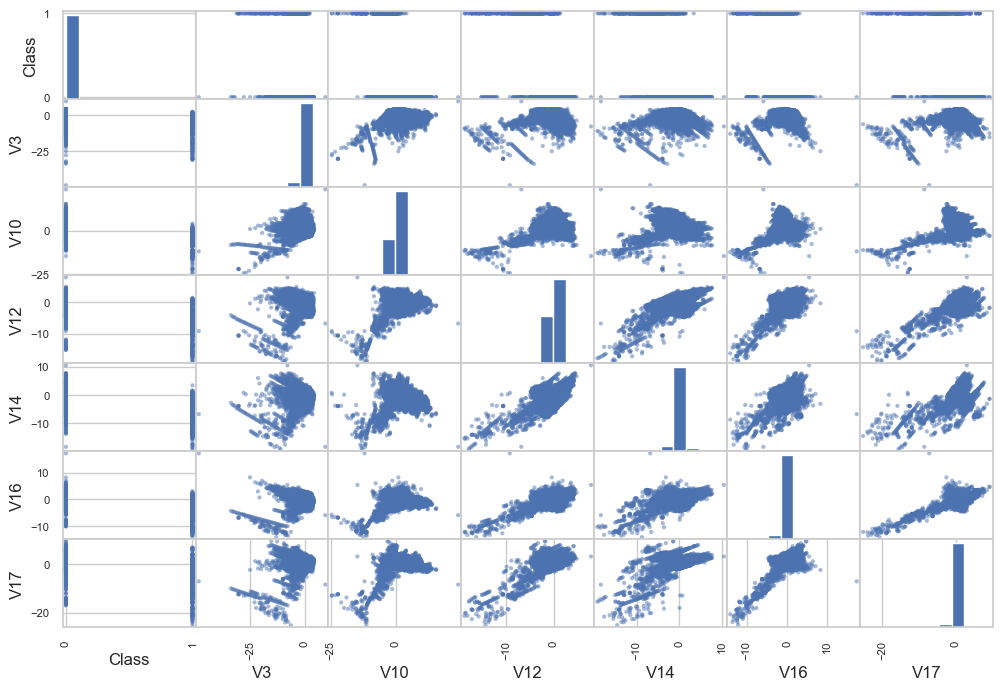

In [10]:
pd.plotting.scatter_matrix(df[['Class','V3','V10','V12','V14','V16','V17']], figsize=(12, 8))
plt.show()

Finally let us check the distribution of the Class column. As seen in the previous correlation plot, the data are overwhelmingly biased towards normal data (Class = 0). 

<Axes: >

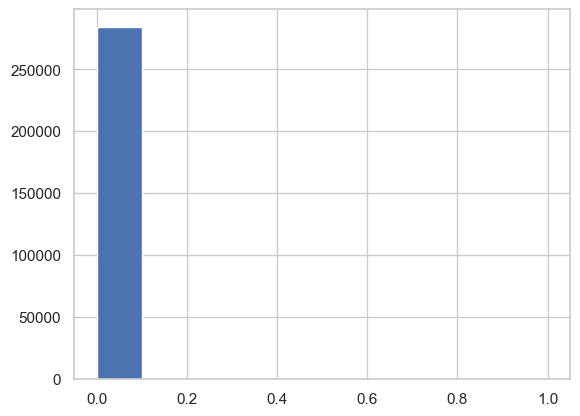

In [11]:
df['Class'].hist()

Alternatively we can look at the pie chart. 99.8% of the transactions are normal, while only 0.2% are fraudulent.

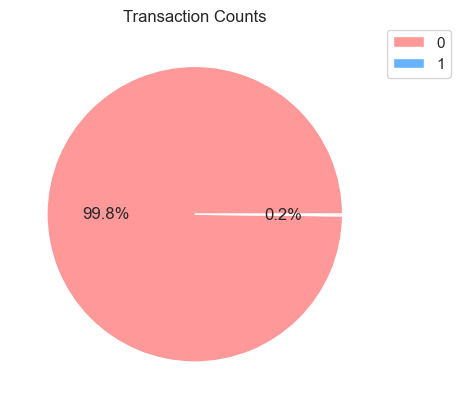

In [12]:
ax = df['Class'].value_counts().plot(kind="pie", autopct='%1.1f%%',colors = ['#ff9999','#66b3ff'], legend=True, title='Transaction Counts', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

Before we move on to next step, let us do some more analysis and explore hidden patterns. First we split the whole dataset into two parts: class 1 and class 0.

In [13]:
anomaly = df[df.Class == 1]
normal = df[df.Class == 0]

Statistical features of Amount attribute in the anomaly sub-dataset.

In [14]:
anomaly.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Statistical features of Amount attribute in the normal sub-dataset.


In [15]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Normal transaction amount lies in a very large range, while fraud much smaller.

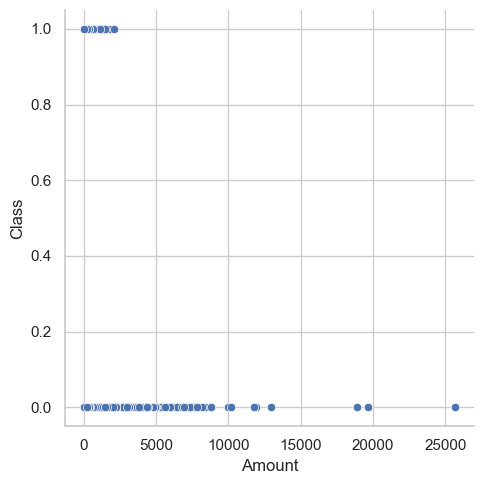

In [16]:
sns.relplot(data=df, x="Amount", y="Class")

Both normal and anomaly transactions happen across all the time span. The normal transations show some pattern. Compared with normal transactions above, the anomaly's pattern is not very clear, although it overlaps with that of normal at around 100000.

<Axes: title={'center': 'Anomaly'}, xlabel='Time', ylabel='Count'>

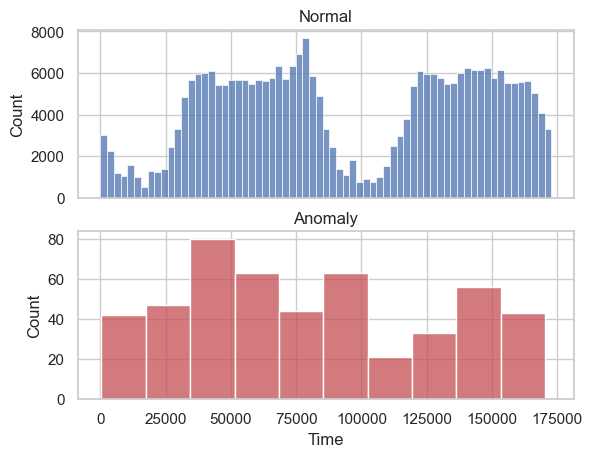

In [17]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].set_title('Normal')
sns.histplot(ax=axes[0], data=normal, x="Time", color='b')

axes[1].set_title('Anomaly')
sns.histplot(ax=axes[1], data=anomaly, x="Time", color='r')

# Step 4. Optimize the data.

Separate the dataset into input and output parts.

In [18]:
X = df.drop(columns="Class", axis=1)
y = df["Class"]

The Time and Amount columns in the input part need to be scaled before applying models like Logistic Regression or K-Nearest Neighbor Classifier. Amount column might have outliers. There are two scalers we can choose from: StandardScaler() and MinMaxScaler(), both of which are very sensitive to outliers. In this project we choose StandardScaler(). 

In [19]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Step 5. Model performance evaluation.

Split the dataset into training and testing parts.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=0)

print("Training sets:\nX_train: {} y_train:{}".format(X_train.shape, y_train.shape))
print("\nTesting sets:\nX_test: {} y_test:{}".format(X_test.shape, y_test.shape))

Training sets:
X_train: (227845, 30) y_train:(227845,)

Testing sets:
X_test: (56962, 30) y_test:(56962,)


Very small p-values suggest that all the 30 features are associated with Class feature.

In [21]:
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:               227845
Model:                            GLM   Df Residuals:                   227815
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41245.
Date:                Thu, 30 Nov 2023   Deviance:                       82490.
Time:                        23:36:09   Pearson chi2:                 2.93e+17
No. Iterations:                     9   Pseudo R-squ. (CS):            -0.4002
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0707      0.008     -8.827      0.0

We will evaluate candidate models using repeated stratified k-fold cross-validation. Each fold will contain about 284807/10 or 28,480 examples. The evaluation process will be performed 3 times to help avoid fluke results and better capture the variance of the chosen model.

In [22]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

We will use the recommended metric of area under precision-recall curve or PR AUC.

In [23]:
def pr_auc(y_true, probas_pred):
 p, r, _ = precision_recall_curve(y_true, probas_pred)
 return auc(r, p)

metric = make_scorer(pr_auc, needs_proba=True)

Here we pick four simple yet commonly used classification algorithms: Logistic Regression, K-Nearest Neighbors, Decision Tree and Random Forest. There could be more complicated models at the cost of increasing run time. 

In [24]:
def get_models():
 models, names = list(), list()
 # LR
 models.append(LogisticRegression(max_iter=1000))
 names.append('LR')      
 # KNN
 models.append(KNeighborsClassifier())
 names.append('KNN')
 # DT
 models.append(DecisionTreeClassifier())
 names.append('DT')
 # RF
 models.append(RandomForestClassifier(n_estimators=4))
 names.append('RF')
 return models, names

Evaluate each model. We will use the SMOTE sampling technique, because the basic implementation of SMOTE will not make any distinction between easy and hard samples to be classified using the nearest neighbors rule. The resampling technique should be performed during corss-validation to avoid overfitting. See Common pitfalls and recommended practices, https://imbalanced-learn.org/stable/common_pitfalls.html#data-leakage.

In [25]:
models, names = get_models()
results = list()
for i in range(len(models)):
 scores = cross_val_score(Pipeline([('sampling', SMOTE()),
                                    ('classifier', models[i])]), 
                         X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)
 results.append(scores)
 print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>LR 0.783 (0.055)
>KNN 0.768 (0.040)
>DT 0.580 (0.042)
>RF 0.819 (0.051)


The results show that of the four algorithms, Random Forest performs the best with a mean PR AUC of ~0.818 and standard deviation ~ 0.05. In the plot, the orange line in the middle of each box shows the median of the scores, and the green triangle in each box shows the mean of the scores. The mean of Random Forest seems to coincide with the median, suggesting the distribution of the scores is close to symmetrical.

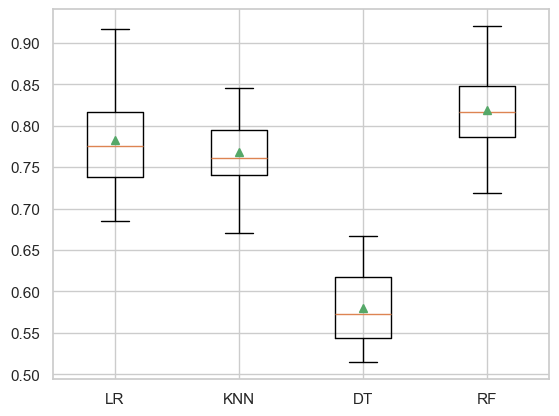

In [26]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Next we will try hyperparameter tuning to find the best parameters for the random forest classifier.

# Step 6. Model optimization: hyperparameter tuning.

In this step, we will use hyperparameter tuning to search for better performance. Below is the parameter list of the random forest classifier.

In [27]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Our search space is defined as a grid of hyperparameters below. The n_estimator could go up to 100 and 1000, but the run time will become much longer.

In [28]:
param_distribs = {'classifier__max_features': ['sqrt', 'log2'], 
                  'classifier__n_estimators': [4, 6, 8, 10]}
param_distribs

{'classifier__max_features': ['sqrt', 'log2'],
 'classifier__n_estimators': [4, 6, 8, 10]}

Evaluate every position in the grid. It could take a while.

In [29]:
model = Pipeline([('sampling', SMOTE()),
                  ('classifier', RandomForestClassifier())])
grid_search = GridSearchCV(estimator=model, param_grid=param_distribs, n_jobs=-1, cv=cv, scoring=metric, error_score=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0,
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__n_estimators': [4, 6, 8, 10]},
             scoring=make_scorer(pr_auc, needs_proba=True))

Print out the best score and the corresponding parameters combination. The specific results could vary when you run the codes a few times.

In [30]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.840059 using {'classifier__max_features': 'log2', 'classifier__n_estimators': 8}


Make predictions on test dataset using the best classifier found above.

In [31]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

Here is the result for the recommended metric AUPRC score on the test set.

In [32]:
y_probs = final_model.predict_proba(X_test)
y_probs = y_probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
auc(recall, precision)

0.8274490994504882

ROC curves should be used when there are roughly equal numbers of observations for each class. Precision-Recall curves should be used when there is a moderate to large class imbalance.

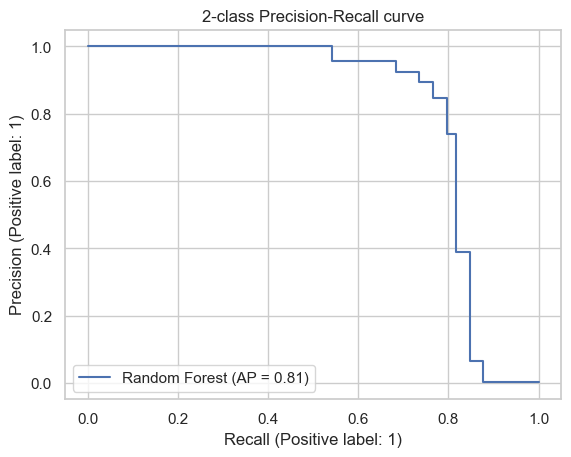

In [33]:
display = PrecisionRecallDisplay.from_estimator(
    final_model, X_test, y_test, name="Random Forest")

_ = display.ax_.set_title("2-class Precision-Recall curve")